In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
print(tf.__version__)

2.10.0


# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
# tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 26

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
103/107 [===========================>..] - ETA: 0s - loss: 3.2141 - accuracy: 0.0721
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 2s 7ms/step - loss: 3.2091 - accuracy: 0.0746 - val_loss: 3.0105 - val_accuracy: 0.2156
Epoch 2/1000
 94/107 [=========================>....] - ETA: 0s - loss: 2.9141 - accuracy: 0.1602
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 6ms/step - loss: 2.8868 - accuracy: 0.1629 - val_loss: 2.5713 - val_accuracy: 0.2715
Epoch 3/1000
105/107 [============================>.] - ETA: 0s - loss: 2.5934 - accuracy: 0.2076
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 2.5910 - accuracy: 0.2078 - val_loss: 2.2475 - val_accuracy: 0.3596
Epoch 4/1000
 97/107 [==========================>...] - ETA: 0s - loss: 2.3700 - accuracy: 

Epoch 28/1000
101/107 [===========================>..] - ETA: 0s - loss: 1.3262 - accuracy: 0.5682
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.3221 - accuracy: 0.5703 - val_loss: 0.7455 - val_accuracy: 0.8560
Epoch 29/1000
105/107 [============================>.] - ETA: 0s - loss: 1.3180 - accuracy: 0.5739
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.3163 - accuracy: 0.5748 - val_loss: 0.7536 - val_accuracy: 0.8107
Epoch 30/1000
107/107 [==============================] - ETA: 0s - loss: 1.3162 - accuracy: 0.5748
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.3162 - accuracy: 0.5748 - val_loss: 0.7399 - val_accuracy: 0.8370
Epoch 31/1000
105/107 [============================>.] - ETA: 0s - loss: 1.2906 - acc

Epoch 55/1000
105/107 [============================>.] - ETA: 0s - loss: 1.1792 - accuracy: 0.6171
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.1849 - accuracy: 0.6159 - val_loss: 0.5808 - val_accuracy: 0.8758
Epoch 56/1000
105/107 [============================>.] - ETA: 0s - loss: 1.1820 - accuracy: 0.6173
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.1808 - accuracy: 0.6179 - val_loss: 0.5830 - val_accuracy: 0.8659
Epoch 57/1000
106/107 [============================>.] - ETA: 0s - loss: 1.1730 - accuracy: 0.6217
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.1713 - accuracy: 0.6225 - val_loss: 0.5602 - val_accuracy: 0.9047
Epoch 58/1000
100/107 [===========================>..] - ETA: 0s - loss: 1.1482 - acc

Epoch 82/1000
105/107 [============================>.] - ETA: 0s - loss: 1.1251 - accuracy: 0.6304
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.1264 - accuracy: 0.6301 - val_loss: 0.5276 - val_accuracy: 0.8823
Epoch 83/1000
105/107 [============================>.] - ETA: 0s - loss: 1.1478 - accuracy: 0.6316
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.1459 - accuracy: 0.6320 - val_loss: 0.5351 - val_accuracy: 0.8819
Epoch 84/1000
103/107 [===========================>..] - ETA: 0s - loss: 1.1243 - accuracy: 0.6392
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.1240 - accuracy: 0.6384 - val_loss: 0.5254 - val_accuracy: 0.8801
Epoch 85/1000
105/107 [============================>.] - ETA: 0s - loss: 1.1341 - acc

Epoch 109/1000
103/107 [===========================>..] - ETA: 0s - loss: 1.1088 - accuracy: 0.6384
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.1105 - accuracy: 0.6380 - val_loss: 0.5002 - val_accuracy: 0.8848
Epoch 110/1000
106/107 [============================>.] - ETA: 0s - loss: 1.0753 - accuracy: 0.6524
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.0737 - accuracy: 0.6530 - val_loss: 0.4943 - val_accuracy: 0.8769
Epoch 111/1000
 99/107 [==========================>...] - ETA: 0s - loss: 1.0737 - accuracy: 0.6503
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 6ms/step - loss: 1.0734 - accuracy: 0.6486 - val_loss: 0.4844 - val_accuracy: 0.8902
Epoch 112/1000
107/107 [==============================] - ETA: 0s - loss: 1.067

Epoch 136/1000
105/107 [============================>.] - ETA: 0s - loss: 1.0381 - accuracy: 0.6635
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.0375 - accuracy: 0.6638 - val_loss: 0.4703 - val_accuracy: 0.8961
Epoch 137/1000
106/107 [============================>.] - ETA: 0s - loss: 1.0551 - accuracy: 0.6637
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.0552 - accuracy: 0.6640 - val_loss: 0.4708 - val_accuracy: 0.9021
Epoch 138/1000
104/107 [============================>.] - ETA: 0s - loss: 1.0392 - accuracy: 0.6619
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.0447 - accuracy: 0.6610 - val_loss: 0.4781 - val_accuracy: 0.8817
Epoch 139/1000
103/107 [===========================>..] - ETA: 0s - loss: 1.055

Epoch 163/1000
104/107 [============================>.] - ETA: 0s - loss: 1.0405 - accuracy: 0.6626
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 0s 5ms/step - loss: 1.0448 - accuracy: 0.6613 - val_loss: 0.4713 - val_accuracy: 0.9003
Epoch 164/1000
 99/107 [==========================>...] - ETA: 0s - loss: 1.0210 - accuracy: 0.6652
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.0215 - accuracy: 0.6648 - val_loss: 0.4591 - val_accuracy: 0.9036
Epoch 165/1000
104/107 [============================>.] - ETA: 0s - loss: 1.0322 - accuracy: 0.6670
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.0310 - accuracy: 0.6678 - val_loss: 0.4613 - val_accuracy: 0.9032
Epoch 166/1000
 93/107 [=========================>....] - ETA: 0s - loss: 1.019

Epoch 190/1000
100/107 [===========================>..] - ETA: 0s - loss: 0.9998 - accuracy: 0.6777
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.0012 - accuracy: 0.6777 - val_loss: 0.4398 - val_accuracy: 0.9189
Epoch 191/1000
 97/107 [==========================>...] - ETA: 0s - loss: 0.9974 - accuracy: 0.6753
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 1.0014 - accuracy: 0.6747 - val_loss: 0.4503 - val_accuracy: 0.9091
Epoch 192/1000
 99/107 [==========================>...] - ETA: 0s - loss: 0.9982 - accuracy: 0.6776
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 0.9965 - accuracy: 0.6781 - val_loss: 0.4454 - val_accuracy: 0.9135
Epoch 193/1000
102/107 [===========================>..] - ETA: 0s - loss: 1.002

Epoch 217/1000
 95/107 [=========================>....] - ETA: 0s - loss: 1.0052 - accuracy: 0.6728
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 0s 4ms/step - loss: 1.0034 - accuracy: 0.6738 - val_loss: 0.4625 - val_accuracy: 0.9036
Epoch 218/1000
 92/107 [========================>.....] - ETA: 0s - loss: 0.9907 - accuracy: 0.6799
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 0s 4ms/step - loss: 0.9863 - accuracy: 0.6825 - val_loss: 0.4447 - val_accuracy: 0.9108
Epoch 219/1000
104/107 [============================>.] - ETA: 0s - loss: 0.9998 - accuracy: 0.6737
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 6ms/step - loss: 1.0004 - accuracy: 0.6735 - val_loss: 0.4565 - val_accuracy: 0.9095
Epoch 220/1000
106/107 [============================>.] - ETA: 0s - loss: 0.998

Epoch 244/1000
103/107 [===========================>..] - ETA: 0s - loss: 0.9834 - accuracy: 0.6833
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 6ms/step - loss: 0.9823 - accuracy: 0.6840 - val_loss: 0.4471 - val_accuracy: 0.9049
Epoch 245/1000
100/107 [===========================>..] - ETA: 0s - loss: 0.9779 - accuracy: 0.6784
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 6ms/step - loss: 0.9743 - accuracy: 0.6793 - val_loss: 0.4492 - val_accuracy: 0.9108
Epoch 246/1000
 99/107 [==========================>...] - ETA: 0s - loss: 0.9814 - accuracy: 0.6864
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.h5
107/107 [==============================] - 1s 5ms/step - loss: 0.9878 - accuracy: 0.6840 - val_loss: 0.4501 - val_accuracy: 0.9082
Epoch 247/1000
101/107 [===========================>..] - ETA: 0s - loss: 0.985

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

36/36 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.9045


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 65ms/step
[4.0402538e-03 1.5639928e-08 9.1208313e-03 4.6807669e-02 2.1276079e-02
 1.3318952e-07 7.3998208e-06 1.1639937e-03 1.3691378e-07 8.4416770e-06
 8.5660479e-10 1.0456943e-04 3.4428663e-03 6.7889071e-01 4.0337918e-03
 9.0812285e-10 4.6107998e-05 3.6964886e-24 2.7606305e-02 7.5986378e-02
 4.7319859e-09 2.9042445e-15 2.1812436e-08 1.2741101e-01 3.1258376e-06
 5.0163584e-05]
13


# Confusion matrix

143/143 [==============================] - 0s 1ms/step


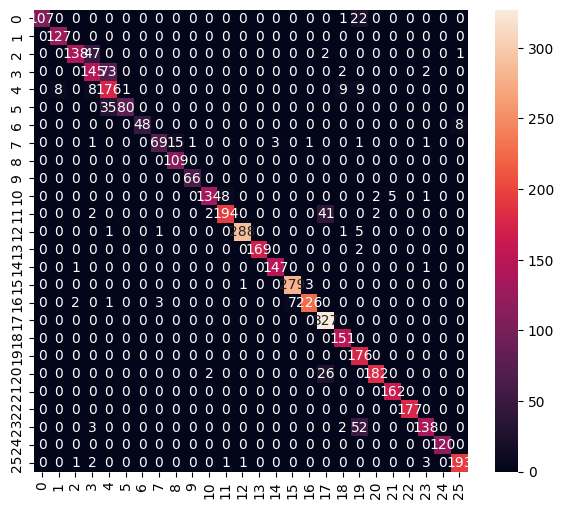

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       130
           1       0.94      1.00      0.97       127
           2       0.97      0.73      0.84       188
           3       0.70      0.65      0.67       222
           4       0.62      0.83      0.71       211
           5       0.99      0.70      0.82       115
           6       1.00      0.86      0.92        56
           7       0.95      0.75      0.84        92
           8       0.88      1.00      0.94       109
           9       0.99      1.00      0.99        66
          10       0.97      0.89      0.93       150
          11       0.96      0.80      0.87       241
          12       0.99      0.97      0.98       296
          13       1.00      0.99      0.99       171
          14       0.98      0.99      0.98       149
          15       0.98      0.99      0.98       283
          16       0.98      0.95      0.96       239
     

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))